# Understanding nanoGPT

Attempt to thoroughly understand nanoGPT, and thus GPT-2, and thus GPT-4.

Starting by going through `model.py` (the PyTorch model specification of GPT-2) line by line.


In [24]:
import math
import torch
import matplotlib.pyplot as plt


## GELU activation function `def new_gelu(x)`

There's a lot of deepness in the choice of this function. The minimal version is that multi-layer networks require a non-linear activation function, otherwise they reduce to a single-layer network. Functions like the sigmoid were used from the 1980s through to about 2010, when Nadir & Hinton (2010) demonstrated that a Rectified Linear Unit (ReLU, i.e. linear above zero input, zero otherwise) led to faster training. GELU (Gaussian Error Linear Unit) was introduced by Hendrycks & Gimpel (2016), with some very interesting theoretical motivation, which you can read in their [paper](https://arxiv.org/abs/1606.08415). They further demonstrated that it improved training relative to ReLU in a range of cases. 

The version used here is the approximation of GELU used by Hendrycks & Gimpel:

$f(x) = 0.5 x (1 + tanh[ \sqrt{2 / \pi} (x + .044715 x^3) ]) $

<function matplotlib.pyplot.show(close=None, block=None)>

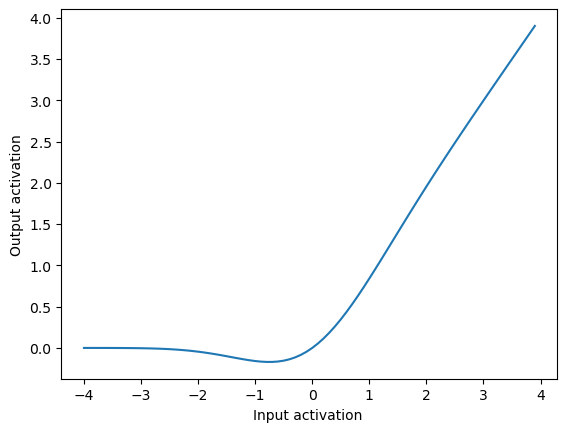

In [32]:
def new_gelu(x):
    return 0.5 * x * (1.0 + torch.tanh(math.sqrt(2.0 / math.pi) * (x + 0.044715 * torch.pow(x, 3.0))))

x = torch.arange(-4, 4, .1)
plt.plot(x, new_gelu(x))
plt.xlabel("Input activation ")
plt.ylabel("Output activation")
plt.show
